In [ ]:
from google.colab import drive   #
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 파일 경로를 각자 컴퓨터 환경에 맞게 수정하세요!
file_path = '/content/drive/MyDrive/부리부리데마왕/dataset/'

In [ ]:
import numpy as np   # 결과해석
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv(file_path + 'creditcard_data.csv')
data.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
# 중복된 row 이는지 확인
print(f"Total duplicate rows = {data.duplicated().sum()}")

Total duplicate rows = 1081


In [ ]:
# 중복된 행 제거
data_cleaned = data.drop_duplicates()

# 중복 제거 후의 데이터셋 크기 확인
print(f"Data shape after removing duplicates = {data_cleaned.shape}")

Data shape after removing duplicates = (283725, 31)


In [ ]:
data_cleaned['Class'].value_counts()

0    283252
1       473
Name: Class, dtype: int64

In [ ]:
y = data_cleaned['Class']
X = data_cleaned.drop(['Class'], axis = 1)

In [ ]:
from imblearn.over_sampling import ADASYN

# ADASYN 모델 초기화 및 샘플링 전략 설정
adasyn = ADASYN(sampling_strategy={1: 250000}, random_state=42)


# ADASYN을 사용하여 오버샘플링
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# 새로운 데이터프레임 생성
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Class')], axis=1)

In [ ]:
Fraud = balanced_data[balanced_data['Class']==1]
Normal = data[data['Class']==0]
Fraud.shape
# Fraud.head()

(250128, 31)

In [ ]:
data_ADASYN = pd.concat([Fraud, Normal], ignore_index=True)
data_ADASYN.shape

(534442, 31)

Case 4. ADASYN + Scale 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

data_ADASYN_case4=data_ADASYN.copy()
#꼬리가 오른쪽으로 긴 변수
pro_skew = ['V3', 'V5', 'V7','V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24','V27', 'V28']
neg_skew = ['V2', 'V11', 'V19', 'V20', 'V21']
normal_col = ['V1', 'V4','V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26' ]

# pro_skew 로그변환 적용
# 변수 내의 최소값이 0 이하인 경우, 모든 값을 조금 올려서 로그 변환이 가능하도록 조정
if (data_ADASYN_case4[pro_skew].min() <= 0).any():  # .any()를 추가하여 Series 전체에서 하나라도 조건을 만족하는지 확인
    for col in pro_skew:
        if data_ADASYN_case4[col].min() <= 0:
            data_ADASYN_case4[col] += abs(data_ADASYN_case4[col].min()) + 0.1

for col in pro_skew:
    data_ADASYN_case4[col + '_log_transformed'] = np.log(data_ADASYN_case4[col])


# neg_skew는 음의 왜도.
# 제곱 변환 적용
for col in neg_skew:
 data_ADASYN_case4[col + '_squared_transformed'] = data_ADASYN_case4[col] ** 2

#normal_col
# 정규화할 변수 리스트
scaler = MinMaxScaler()
for col in normal_col:
    data_ADASYN_case4[col + '_minmax_transformed'] = scaler.fit_transform(data_ADASYN_case4[col].values.reshape(-1, 1)) # 2차원 배열로 바꿔서 실행

# 적용 다한 column은 drop

data_ADASYN_case4.drop(columns = pro_skew+neg_skew+normal_col, inplace = True)

print(data_ADASYN_case4.head())

X_case4 = data_ADASYN_case4.drop('Class',axis=1)
Y_case4 = data_ADASYN_case4['Class']

# 데이터 나누기
X_case4_train, X_case4_test, Y_case4_train, Y_case4_test = train_test_split(X_case4, Y_case4, test_size=0.3, random_state=25)

     Time  Amount  Class  V3_log_transformed  V5_log_transformed  \
0   406.0    0.00      1            3.846219            4.730226   
1   472.0  529.00      1            3.902257            4.746697   
2  4462.0  239.93      1            3.872572            4.727580   
3  6986.0   59.00      1            3.824999            4.724864   
4  7519.0    1.00      1            3.786936            4.766162   

   V7_log_transformed  V9_log_transformed  V10_log_transformed  \
0            3.716491            2.376205             3.087217   
1            3.783799            2.584987             3.171771   
2            3.789167            2.587449             3.142550   
3            3.692897            2.586733             2.990047   
4            3.814866            2.505625             3.101928   

   V12_log_transformed  V14_log_transformed  ...  V21_squared_transformed  \
0             2.765300             2.709720  ...                 0.267529   
1             2.905839             2.869

case 5 : ADASYN + Scale 2

In [ ]:
def quantileTransform(data, columns):
    qt = QuantileTransformer()
    scaled_data = pd.DataFrame(qt.fit_transform(data[columns]), columns=columns)
    return scaled_data

def boxcox_transform(data, columns, lambda_value):
    if lambda_value == 0:
        return np.log(data[columns])
    else:
        return (data[columns] ** lambda_value - 1) / lambda_value

data_ADASYN_case5 = data_ADASYN.copy()

X_case5 = data_ADASYN_case5.drop('Class',axis=1)
Y_case5 = data_ADASYN_case5['Class']

left_skewed_cols = ['V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24', 'V27', 'V28']
right_skewed_cols = ['V2', 'V11', 'V19', 'V20', 'V21']

for col in left_skewed_cols:
    # 음의 왜도를 가진 열의 최소값이 0보다 작거나 같은 경우 양수로 변환
    if X_case5[col].min() <= 0:
        X_case5[col] += abs(X_case5[col].min()) + 1

# train_scaler
smtrain_left_skewed = boxcox_transform(X_case5, left_skewed_cols, 0.01)
smtrain_right_skewed = quantileTransform(X_case5, right_skewed_cols)

train_transformed_sm = pd.concat([X_case5, smtrain_left_skewed.add_suffix('_box_Transform'), smtrain_right_skewed.add_suffix('_qt_Transform')], axis=1)

# 그 외 수치
# minmax? standard?
from sklearn.preprocessing import StandardScaler
s_columns = ['V1', 'V4', 'V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26']
standardScaler = StandardScaler()

for col in s_columns:
    train_transformed_sm[col + '_standard_Transform'] = standardScaler.fit_transform(train_transformed_sm[[col]])

#train_transformed --> 전처리가 진행된 데이터
train_transformed_sm.drop(columns =left_skewed_cols + right_skewed_cols + s_columns, inplace = True)

data_ADASYN_case5=train_transformed_sm
print(data_ADASYN_case5.head())


X_case5_train, X_case5_test, Y_case5_train, Y_case5_test = train_test_split(data_ADASYN_case5, Y_case5, test_size=0.3, random_state=25)

     Time  Amount  V3_log_Transform  V5_log_Transform  V7_log_Transform  \
0   406.0    0.00          3.867355          4.739011          3.740519   
1   472.0  529.00          3.922252          4.755340          3.806281   
2  4462.0  239.93          3.893163          4.736389          3.811530   
3  6986.0   59.00          3.846583          4.733697          3.717492   
4  7519.0    1.00          3.809348          4.774639          3.836668   

   V9_log_Transform  V10_log_Transform  V12_log_Transform  V14_log_Transform  \
0          2.465042           3.131835           2.826355           2.774154   
1          2.657677           3.212845           2.959098           2.924360   
2          2.659967           3.184816           2.582002           2.936206   
3          2.659301           3.039109           2.182776           2.605887   
4          2.584089           3.145909           2.719589           2.655703   

   V15_log_Transform  ...  V21_qt_Transform  V1_MM_Transform  V4_MM_

case 6 : ADASYN + Scale 6

In [ ]:
from sklearn.preprocessing import StandardScaler

data_ADASYN_case6=data_ADASYN.copy()

#Time만 스케일링
X_case6 = data_ADASYN_case6.drop('Class',axis=1).values
Y_case6 = data_ADASYN_case6['Class'].values
TS = data_ADASYN_case6['Time'].values

#TS 스케일링
scale=StandardScaler()
TS_scaled = scale.fit_transform(TS.reshape(-1, 1))  # TS를 2D 배열로 변환하여 스케일링


# TS_scaled를 DataFrame으로 변환
TS_df = pd.DataFrame(TS_scaled, columns=['Time_Scaled'])

# X_TS와 TS_df를 concat하여 새로운 DataFrame을 생성
X_case6 = pd.concat([pd.DataFrame(X_case6), TS_df], axis=1)

X_case6_train, X_case6_test, Y_case6_train, Y_case6_test = train_test_split(X_case6, Y_case6, test_size = 0.30, random_state = 25)


print(X_case6_train.shape,Y_case6_train.shape)
print(X_case6_test.shape,Y_case6_test.shape)

(374109, 31) (374109,)
(160333, 31) (160333,)


In [ ]:
from sklearn.naive_bayes import GaussianNB # case 4


model = GaussianNB()   # 가우시안 naive Bayes
model.fit(X_case4_train , Y_case4_train)  # 가우시안을 SMOTE로 했을 때는 잘나옴.
# 내 생각엔 변수간의 독립성을 주어진 상태이므로 더 잘나오는 거라고 생각함.

GaussianNB()

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = Y_case4_test
predicted = model.predict(X_case4_test)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print('Accuracy:', accuracy_score(expected, predicted))
print('F1 Score:', f1)


              precision    recall  f1-score   support

           0       0.75      0.99      0.85     85271
           1       0.98      0.63      0.76     75062

    accuracy                           0.82    160333
   macro avg       0.86      0.81      0.81    160333
weighted avg       0.86      0.82      0.81    160333

Accuracy: 0.8187210368420724
F1 Score: 0.7639620910043284


In [ ]:
from sklearn.metrics import confusion_matrix
# 그 다른것도 다

# 혼동 행렬 얻기
conf_matrix = confusion_matrix(expected, predicted)

# False Positive, True Negative 값을 추출
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# False Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive , True Negative
tn, fp, fn, tp = conf_matrix.ravel()


# FPR 계산
fpr = fp / (fp + tn)

#Sensitivity
Sensitivity = tp / (tp + tn)

#Specision
Specision = fn / (fp + fn)

# Precision
pre = tp / (tp + fp)

#FNR
tnr = tn / (tp + tn)

#TPR
tpr= tp / (tp + fn)


print('Sensitivity',Sensitivity )
print('Specision',Specision )
print('Precision', pre)
print('False Positive Rate:', fpr)
print('False Negative Rate : ',tnr )
print('True Positive Rate:', tpr)

Sensitivity 0.3583203827284639
Specision 0.9642525374161363
Precision 0.9783879355174206
False Positive Rate: 0.01218468177926845
False Negative Rate :  0.6416796172715361
True Positive Rate: 0.626628653646319


In [ ]:
from sklearn.naive_bayes import BernoulliNB  # 베르누이 NB case 4


model = BernoulliNB(alpha=2.0)
model.fit(X_case4_train, Y_case4_train)

BernoulliNB(alpha=2.0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = Y_case4_test
predicted = model.predict(X_case4_test)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print('Accuracy:', accuracy_score(expected, predicted))
print('F1 Score:', f1)


              precision    recall  f1-score   support

           0       0.54      1.00      0.70     85271
           1       0.99      0.02      0.05     75062

    accuracy                           0.54    160333
   macro avg       0.76      0.51      0.37    160333
weighted avg       0.75      0.54      0.39    160333

Accuracy: 0.5425583005370074
F1 Score: 0.04527407870243814


In [ ]:
from sklearn.metrics import confusion_matrix
# 그 다른것도 다

# 혼동 행렬 얻기
conf_matrix = confusion_matrix(expected, predicted)

# False Positive, True Negative 값을 추출
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# False Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive , True Negative
tn, fp, fn, tp = conf_matrix.ravel()


# FPR 계산
fpr = fp / (fp + tn)

#Sensitivity
Sensitivity = tp / (tp + tn)

#Specision
Specision = fn / (fp + fn)

# Precision
pre = tp / (tp + fp)

#FNR
tnr = tn / (tp + tn)




print('Sensitivity',Sensitivity )
print('Specision',Specision )
print('Precision', pre)
print('False Positive Rate:', fpr)
print('False Negative Rate : ',tnr )

Sensitivity 0.019990803540636856
Specision 0.9997273086729477
Precision 0.9886299033541786
False Positive Rate: 0.00023454632876358903
False Negative Rate :  0.9800091964593631


In [ ]:
from sklearn.naive_bayes import GaussianNB # case 5


model = GaussianNB()   # 가우시안 naive Bayes
model.fit(X_case5_train , Y_case5_train)  # 가우시안을 SMOTE로 했을 때는 잘나옴.
# 내 생각엔 변수간의 독립성을 주어진 상태이므로 더 잘나오는 거라고 생각함.

GaussianNB()

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = Y_case5_test
predicted = model.predict(X_case5_test)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print('Accuracy:', accuracy_score(expected, predicted))
print('F1 Score:', f1)


              precision    recall  f1-score   support

           0       0.69      0.96      0.80     85271
           1       0.92      0.51      0.65     75062

    accuracy                           0.75    160333
   macro avg       0.80      0.73      0.73    160333
weighted avg       0.80      0.75      0.73    160333

Accuracy: 0.7483924083002251
F1 Score: 0.6530791259255436


In [ ]:
from sklearn.metrics import confusion_matrix
# 그 다른것도 다

# 혼동 행렬 얻기
conf_matrix = confusion_matrix(expected, predicted)

# False Positive, True Negative 값을 추출
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# False Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive , True Negative
tn, fp, fn, tp = conf_matrix.ravel()


# FPR 계산
fpr = fp / (fp + tn)

#Sensitivity
Sensitivity = tp / (tp + tn)

#Specision
Specision = fn / (fp + fn)

# Precision
pre = tp / (tp + fp)

#FNR
tnr = tn / (tp + tn)




print('Sensitivity',Sensitivity )
print('Specision',Specision )
print('Precision', pre)
print('False Positive Rate:', fpr)
print('False Negative Rate : ',tnr )

Sensitivity 0.31644609640642707
Specision 0.9194368012691803
Precision 0.9211566919773901
False Positive Rate: 0.038113778424083214
False Negative Rate :  0.6835539035935729


In [ ]:
from sklearn.naive_bayes import BernoulliNB  # 베르누이 NB case 5


model = BernoulliNB(alpha=2.0)
model.fit(X_case5_train, Y_case5_train)

BernoulliNB(alpha=2.0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = Y_case5_test
predicted = model.predict(X_case5_test)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print('Accuracy:', accuracy_score(expected, predicted))
print('F1 Score:', f1)


              precision    recall  f1-score   support

           0       0.53      1.00      0.69     85271
           1       0.96      0.00      0.00     75062

    accuracy                           0.53    160333
   macro avg       0.75      0.50      0.35    160333
weighted avg       0.73      0.53      0.37    160333

Accuracy: 0.531974078948189
F1 Score: 0.0006126308499587141


In [ ]:
from sklearn.metrics import confusion_matrix
# 그 다른것도 다

# 혼동 행렬 얻기
conf_matrix = confusion_matrix(expected, predicted)

# False Positive, True Negative 값을 추출
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# False Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive , True Negative
tn, fp, fn, tp = conf_matrix.ravel()


# FPR 계산
fpr = fp / (fp + tn)

#Sensitivity
Sensitivity = tp / (tp + tn)

#Specision
Specision = fn / (fp + fn)

# Precision
pre = tp / (tp + fp)

#FNR
tnr = tn / (tp + tn)




print('Sensitivity',Sensitivity )
print('Specision',Specision )
print('Precision', pre)
print('False Positive Rate:', fpr)
print('False Negative Rate : ',tnr )

Sensitivity 0.0002696587058726976
Specision 0.9999866737739872
Precision 0.9583333333333334
False Positive Rate: 1.1727316438179452e-05
False Negative Rate :  0.9997303412941273


In [ ]:
from sklearn.naive_bayes import GaussianNB # case 6

X_case6_train.columns = X_case6_train.columns.astype(str)

model = GaussianNB()   # 가우시안 naive Bayes
model.fit(X_case6_train , Y_case6_train)  # 가우시안을 SMOTE로 했을 때는 잘나옴.
# 내 생각엔 변수간의 독립성을 주어진 상태이므로 더 잘나오는 거라고 생각함.

GaussianNB()

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

X_case6_test.columns = X_case6_test.columns.astype(str)

expected = Y_case6_test
predicted = model.predict(X_case6_test)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print('Accuracy:', accuracy_score(expected, predicted))
print('F1 Score:', f1)


              precision    recall  f1-score   support

           0       0.81      0.99      0.89     85271
           1       0.99      0.74      0.85     75062

    accuracy                           0.87    160333
   macro avg       0.90      0.87      0.87    160333
weighted avg       0.90      0.87      0.87    160333

Accuracy: 0.8747045212152208
F1 Score: 0.8470539867678744


In [ ]:
from sklearn.metrics import confusion_matrix
# 그 다른것도 다

# 혼동 행렬 얻기
conf_matrix = confusion_matrix(expected, predicted)

# False Positive, True Negative 값을 추출
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# False Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive , True Negative
tn, fp, fn, tp = conf_matrix.ravel()


# FPR 계산
fpr = fp / (fp + tn)

#Sensitivity
Sensitivity = tp / (tp + tn)

#Specision
Specision = fn / (fp + fn)

# Precision
pre = tp / (tp + fp)

#FNR
tnr = tn / (tp + tn)




print('Sensitivity',Sensitivity )
print('Specision',Specision )
print('Precision', pre)
print('False Positive Rate:', fpr)
print('False Negative Rate : ',tnr )

Sensitivity 0.39665868058526565
Specision 0.9673453133555677
Precision 0.9883450297592609
False Positive Rate: 0.00769311958344572
False Negative Rate :  0.6033413194147343


In [ ]:
from sklearn.naive_bayes import BernoulliNB  # 베르누이 NB case 6


model = BernoulliNB(alpha=2.0)
model.fit(X_case6_train, Y_case6_train)

BernoulliNB(alpha=2.0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

X_case6_test.columns = X_case6_test.columns.astype(str)

expected = Y_case6_test
predicted = model.predict(X_case6_test)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print('Accuracy:', accuracy_score(expected, predicted))
print('F1 Score:', f1)


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     85271
           1       1.00      0.88      0.93     75062

    accuracy                           0.94    160333
   macro avg       0.95      0.94      0.94    160333
weighted avg       0.95      0.94      0.94    160333

Accuracy: 0.9423075723650153
F1 Score: 0.9345864448970356


In [ ]:
from sklearn.metrics import confusion_matrix
# 그 다른것도 다

# 혼동 행렬 얻기
conf_matrix = confusion_matrix(expected, predicted)

# False Positive, True Negative 값을 추출
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# False Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive , True Negative
tn, fp, fn, tp = conf_matrix.ravel()


# FPR 계산
fpr = fp / (fp + tn)

#Sensitivity
Sensitivity = tp / (tp + tn)

#Specision
Specision = fn / (fp + fn)

# Precision
pre = tp / (tp + fp)

#FNR
tnr = tn / (tp + tn)




print('Sensitivity',Sensitivity )
print('Specision',Specision )
print('Precision', pre)
print('False Positive Rate:', fpr)
print('False Negative Rate : ',tnr )

Sensitivity 0.43736886347239595
Specision 0.9711351351351352
Precision 0.9959756428420704
False Positive Rate: 0.0031311934889939135
False Negative Rate :  0.562631136527604


랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

def train_and_evaluate(model, model_name, train_x, train_y):
    print(f'Model Tune for {model_name}.')
    model.fit(train_x, train_y)

    feature_importances = model.feature_importances_
    sorted_idx = feature_importances.argsort()

    plt.figure(figsize=(10, len(train_x.columns)))
    plt.title(f"Feature Importances ({model_name})")
    plt.barh(range(train_x.shape[1]), feature_importances[sorted_idx], align='center')
    plt.yticks(range(train_x.shape[1]), train_x.columns[sorted_idx])
    plt.xlabel('Importance')
    plt.show()

    return model, feature_importances

# train_x = Train.drop(columns=['Class'])
# train_y = Train['Class']

Model Tune for lgbm.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 320517, number of used features: 29
[LightGBM] [Info] Start training from score 0.468424


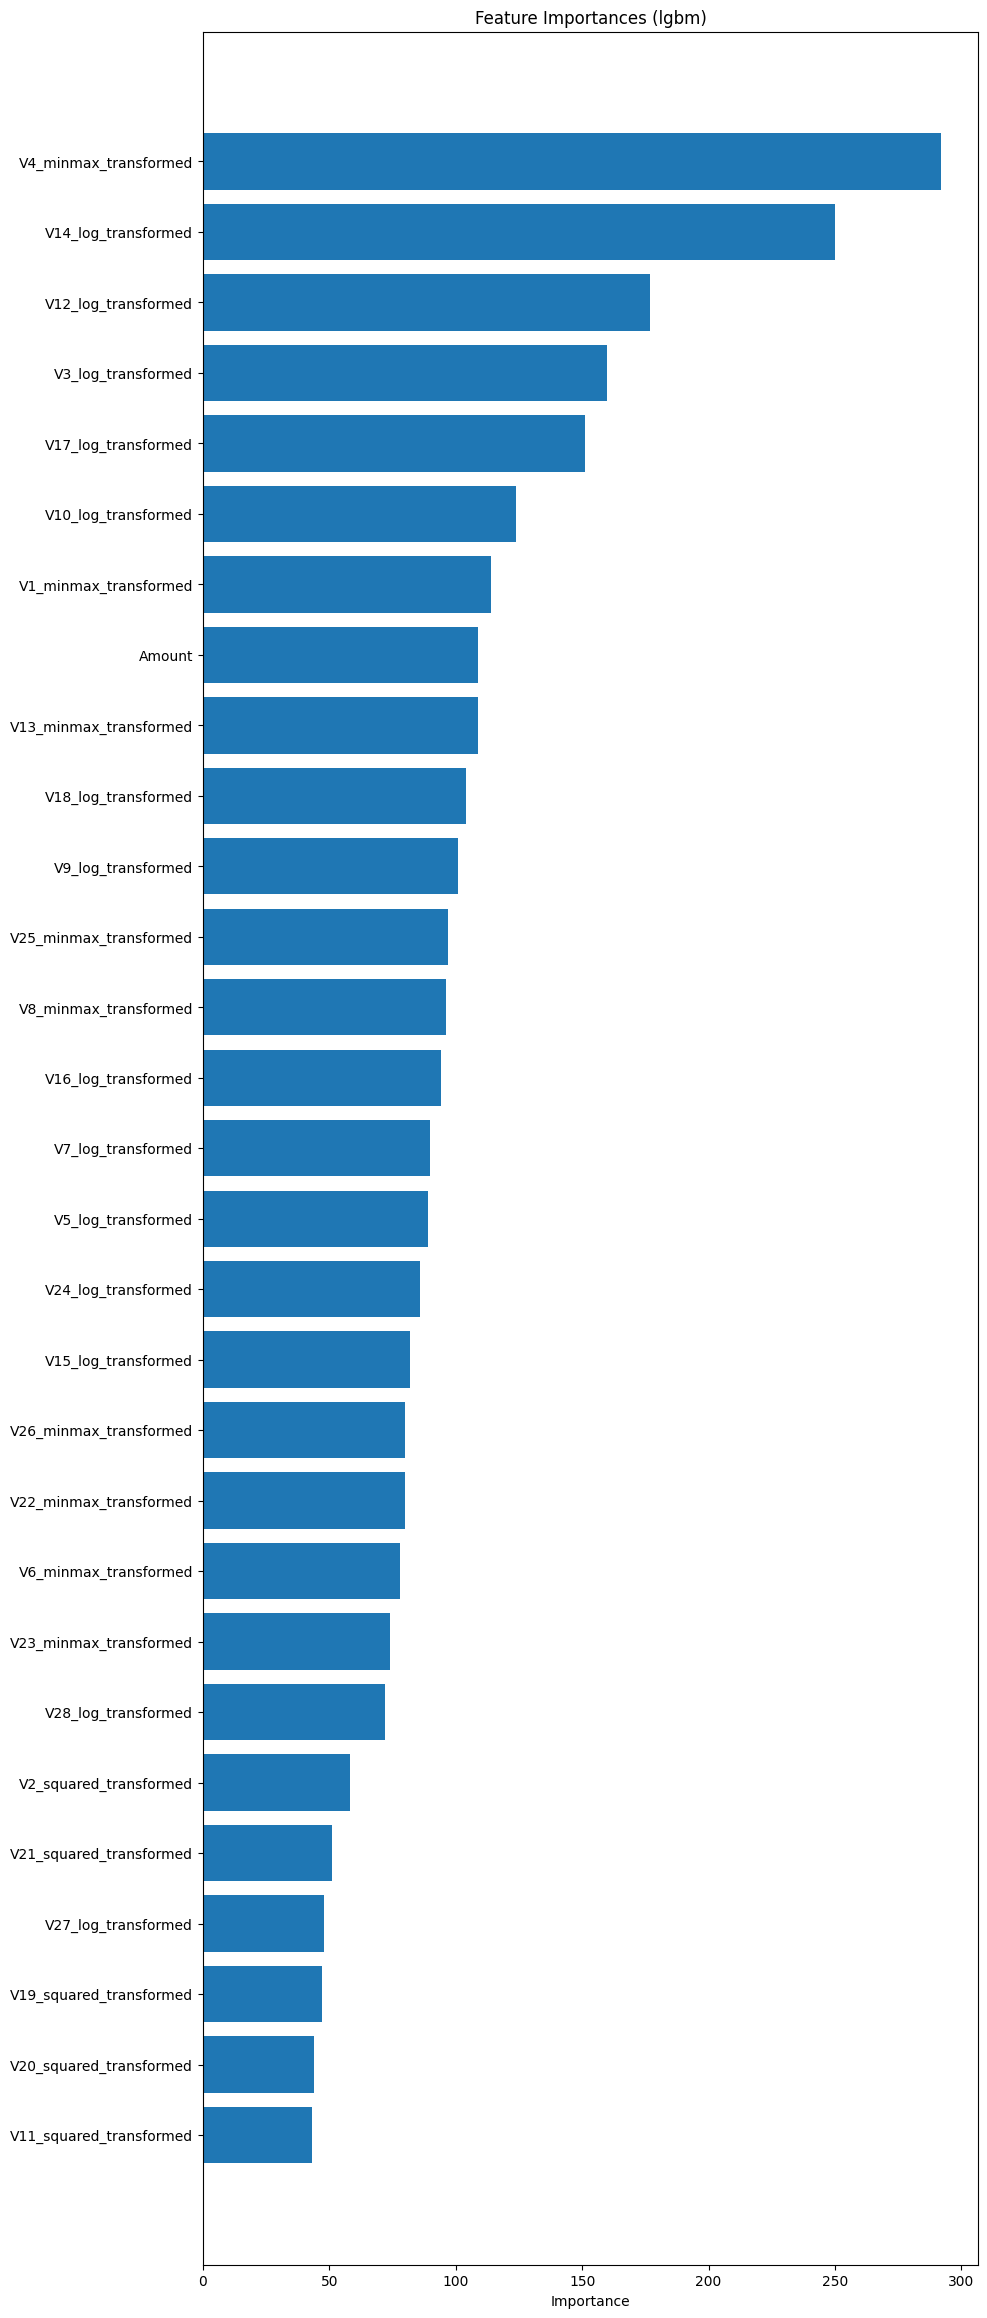

In [ ]:
# Model Tune for LGBM
lgbm_model, lgbm_feature_importances = train_and_evaluate(LGBMRegressor(), 'lgbm', X_train, y_train)

Model Tune for RandomForest.


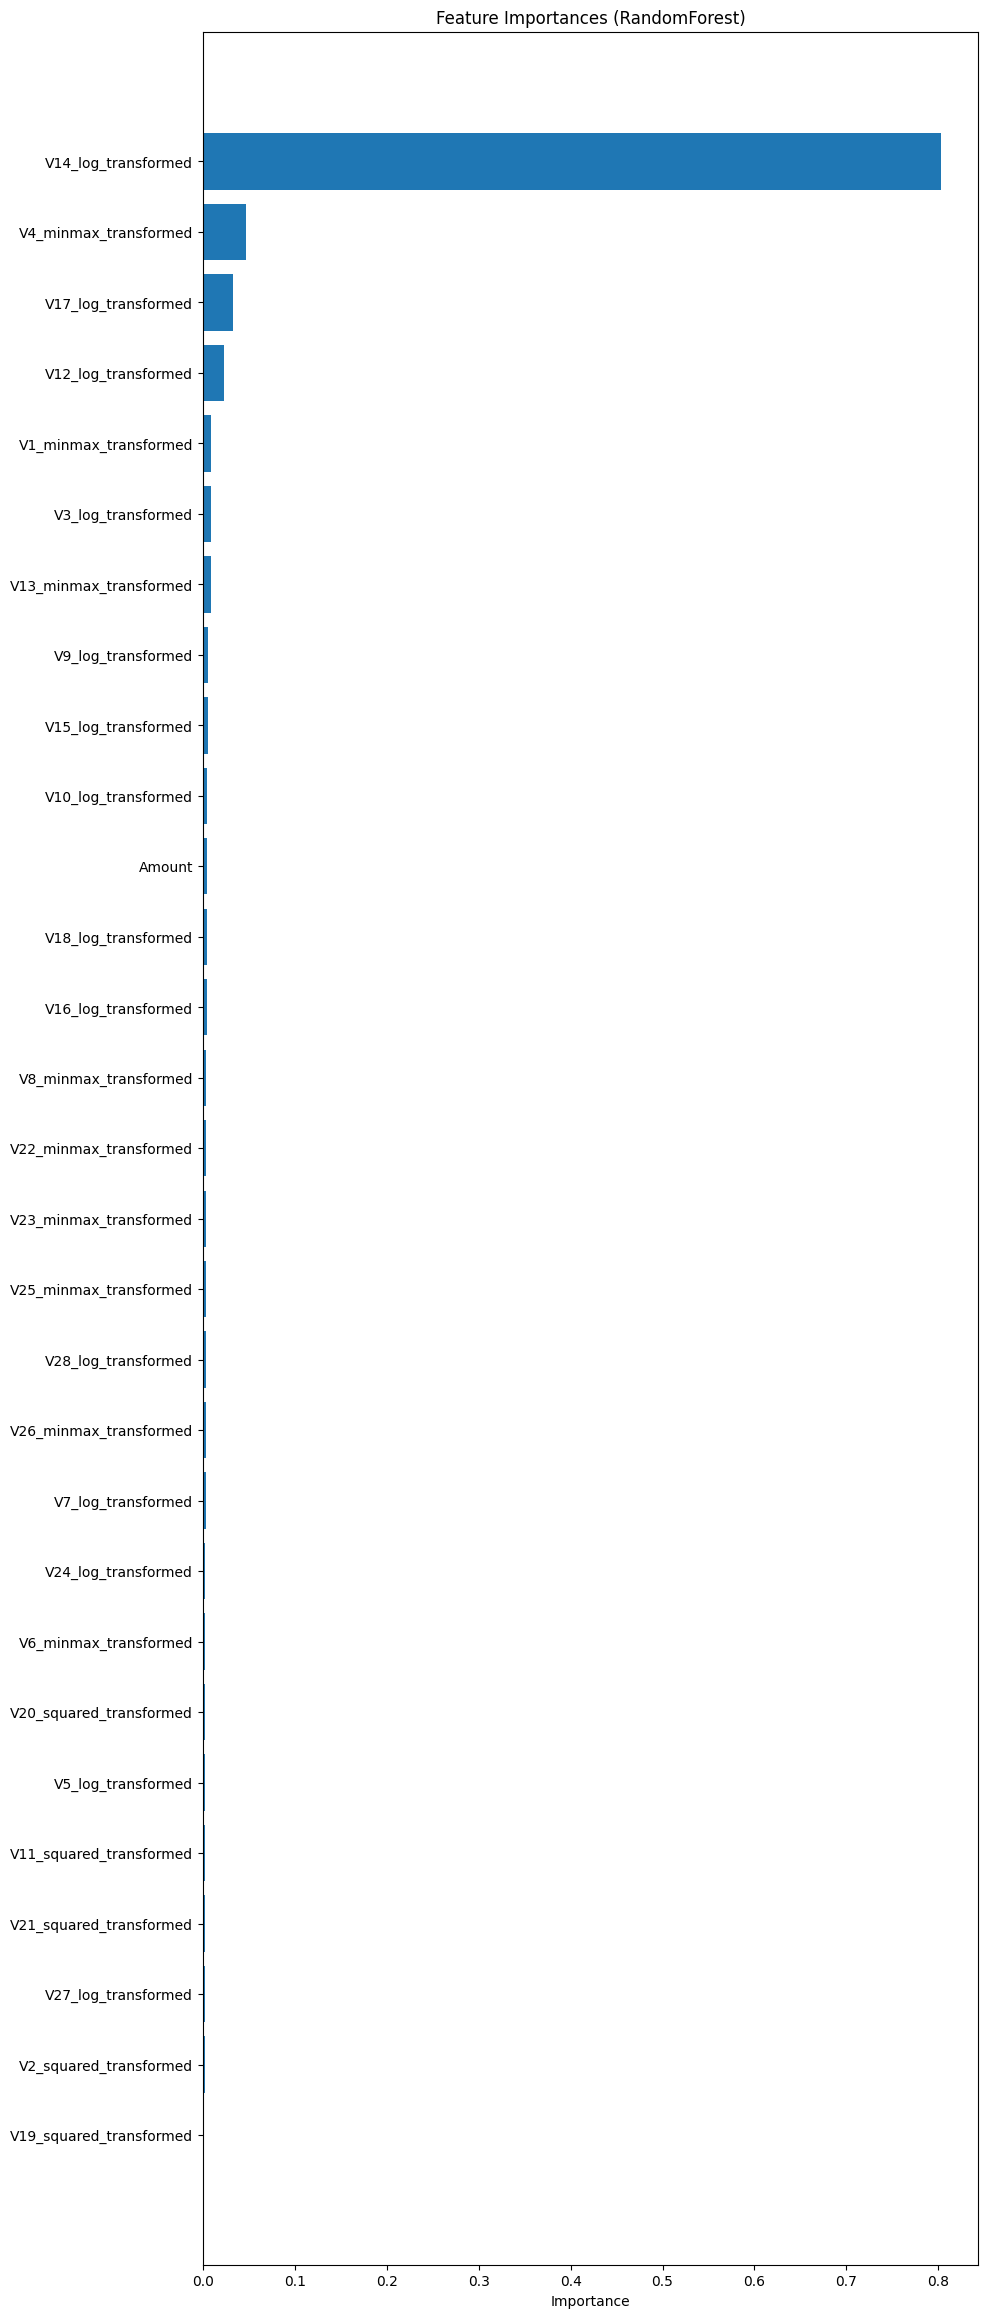

In [ ]:
# Model Tune for Randomforest
ada_model, ada_feature_importances = train_and_evaluate(RandomForestRegressor(), 'RandomForest', X_train, y_train)